### Data Analyst 
A data analyst collects, processes and performs statistical analyses on large dataset. They discover how data can be used to answer questions and solve problems. With the development of computers and an ever increasing move toward technological intertwinement, data analysis has evolved. The development of the relational database gave a new breath to data analysts, which allowed analysts to use SQL (pronounced “sequel” or “s-q-l”) to retrieve data from databases.

### Typical job descriptions
Most jobs in data analytics involve gathering and cleaning data to uncover trends and business insights. The day-to-day data analyst job varies depending on the industry or company or the type of data analytics you consider your specialty. Data analysts may be responsible for creating dashboards, designing and maintaining relationship databases and systems for different departments throughout their organization using business intelligence software, Tableau, and programming.

Most data analysts work with IT teams, management and/or data scientists to determine organizational goals. They mine and clean data from primary and secondary sources then analyze and interpret results using standard statistical tools and techniques. In most cases, they pinpoint trends, correlations and patterns in complex data sets and identify new opportunities for process improvement. Data analysts must also create reports on their findings and communicate next steps to key stakeholders.

### A Day in the Life of a Data Analyst

The day-to-day for a data analyst depends on where they work and what tools they work with. Some data analysts don’t use programming languages and prefer statistical software and Excel. Depending on the problems they are trying to solve, some analysts perform regression analysis or create data visualizations. Experienced data analysts are sometimes considered “junior data scientists” or “data scientists in training.” In some cases, a data analyst/scientist could be writing queries or addressing standard requests in the morning and building custom solutions or experimenting with relational databases, Hadoop and NoSQL in the afternoon.

“A big part of my job is creating player projections for Fantasy Baseball. These power the default rankings in our draft rooms and inform my preseason and in-season rankings of players. Our readers and customers of our Fantasy product rely on the accuracy of these projections, so it’s important to have a sound statistical basis for making them.During the season, we have a high degree of interaction with our audience, as a large part of our responsibility is to respond to questions about player value and performance. Statistical analysis informs these recommendations, whether they are made through social media platforms, written and video content, or podcasts”

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
df = pd.read_csv("/kaggle/input/data-analyst-jobs/DataAnalyst.csv")

In [ ]:
df

### Data Cleaning
1. Changing range of salary into median,lower and upper range
2. Changing the datatype from string to numeric
3. Dropping unnecessary columns

Exteacting upper and lower salary limit from salary range

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: str(x)[:-17])
df

In [ ]:
df["Salary Estimate"]= df["Salary Estimate"].str.replace('$', "") 
df["Salary Estimate"]= df["Salary Estimate"].str.replace('K', "") 
df['Salary Estimate'].value_counts()

In [ ]:
df

Creating 2 fields out of the range of salaries:
1. Lower limit
2. Upper limit

In [ ]:
def row(num):
    for x in num:
        return num[0:2]
def rows(num):
    for x in num:
        return num[3:6]    
df['Lower limit'] = df['Salary Estimate'].apply(row)   
df['Upper limit'] = df['Salary Estimate'].apply(rows)   


Convert string to numeric form

In [ ]:
df['Lower limit'] = pd.to_numeric(df['Lower limit'])
df['Upper limit'] = pd.to_numeric(df['Upper limit'])
df['Median Salary'] = ((df['Lower limit'] + df['Upper limit']) / 2)
df

Dropping the salary range column

In [ ]:
df = df.drop(df.columns[2], axis = 1)  

df

### Salary

Studying salary across various fileds (All are in averages):
1. Salary based on Sectors
2. Salary based on revenue
3. Salary based on sector
4. Salary as per location
5. Salary as per company size

1.1 Average lower salary range categorised by industry

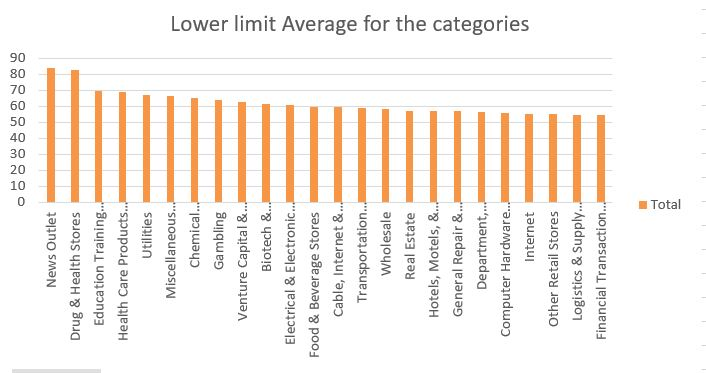

1.1 Average upper salary  (Industry)

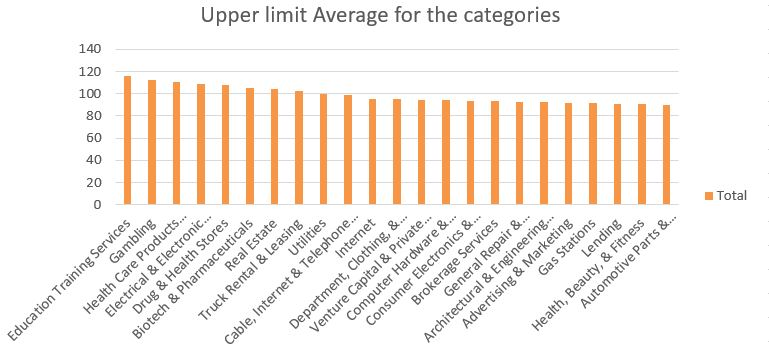

1.2 Salary based on Revenue (Sorted by lower limit)
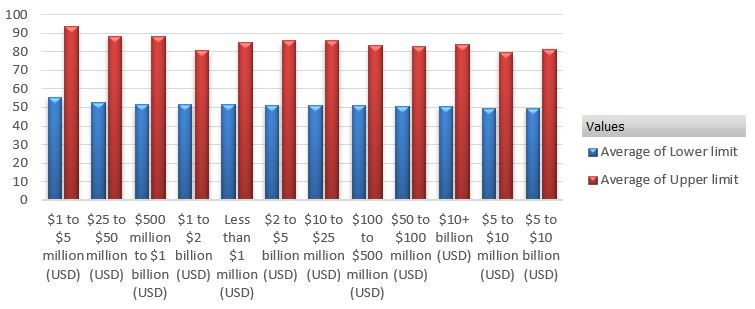

Insight: It can be observed that companies with comparitively lower revenues are generally paying more

1.3 Salary based on sector
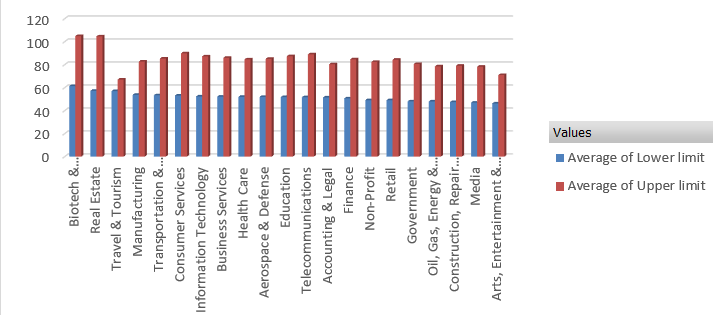
Insight Top3 Sectors
1. Pharmaceuticals
2. Real estate 
3. Manufacturing(Since there is only one job opening for travel sector)

1.4 Average Median salary as per location
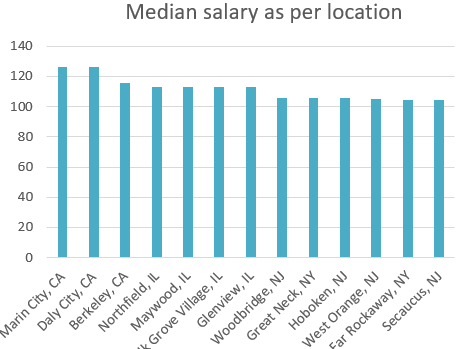
1. Marlin 
2. Daly
3. Berkeley

1.5 Average Salary as per size of the company
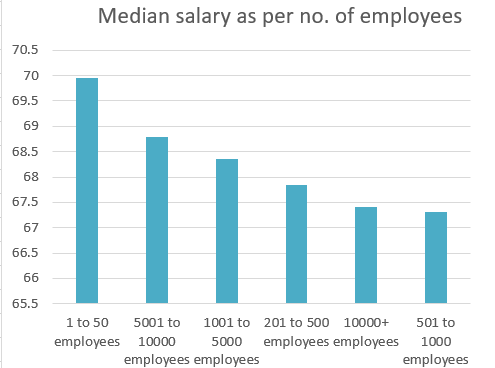

Average variablity i.e (Upper limit - Lower limit) as per sector
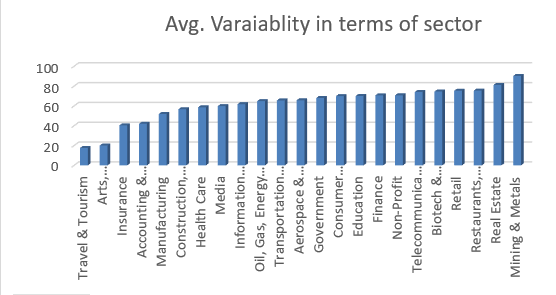

### Ratings 
1. Based on sector
2. Company revenue
3. Company size
4. Ownership

2.1 Average rating as per sector
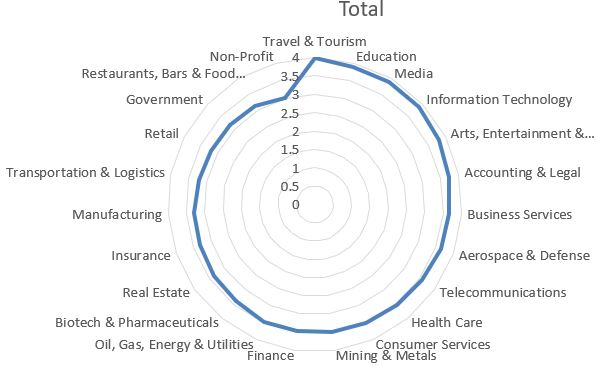


Ratings as per sector based on employees reviews(All these top 4 companies have count of reviews more than 100)  

1. Travel & Tourism
2. Education
3. Media
4. IT


2.2 Average Ratings as per revenue of the company

In [ ]:
df1 = df.copy()
df1.drop(df1.loc[df1['Rating']== -1].index, inplace=True)
df1.drop(df1.loc[df1['Size']== 'Unknown'].index, inplace=True)


In [ ]:
df_daily=df1.groupby('Revenue').agg(['mean']).reset_index()
df_daily.plot(x='Revenue', y = 'Rating',kind="bar")
plt.show()

2.3 Average rating as per company size

In [ ]:
plt.figure(figsize=(12,12))
df_daily=df1.groupby('Size').agg(['mean']).reset_index()
df_daily.sort_values('Size',inplace=True)
df_daily.plot(x='Size', y = 'Rating',kind="barh", color='y')
plt.show()

2.4 Average ratings based on Ownership
1. College/University
2. Franchise
3. Private Practice firm
4. Hospital 

In [ ]:
df.groupby('Type of ownership')['Rating'].mean().nlargest(5)

### Competitors

Companies having most no. of competitors
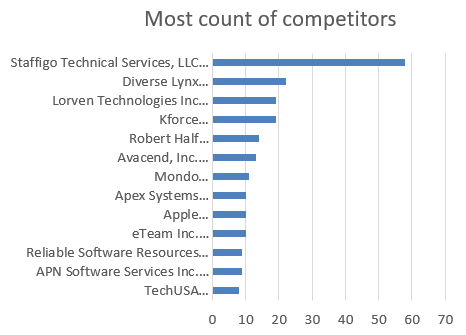

Competitors as per sector
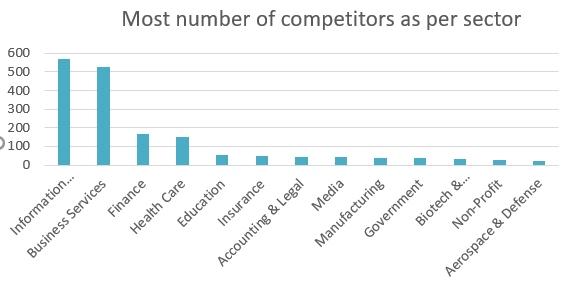

Competitors as per revenue
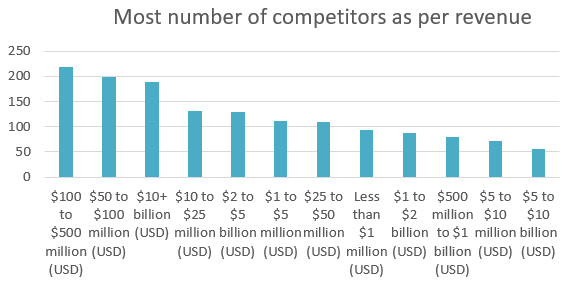

#### Top 20 most strings used in job description

In [ ]:
pd.Series(' '.join(df['Job Title']).lower().split()).value_counts().nlargest(20)

Insights:
1. Since sr and Senior are the same thing it shows that there is greater demand for senior data analysts in companies

#### Top 20 most strings used in job description

In [ ]:
pd.Series(' '.join(df['Job Description']).lower().split()).value_counts().nlargest(20)

In [ ]:
pd.Series(' '.join(df['Job Description']).lower().split()).value_counts()[30:70]

Insight:
* Shows the importance of SQL which might be required in most of the jobs